In [1]:
import os          ### importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
os.chdir(r'C:\Users\guthu\Desktop\Feynn labs')    ### change to working directory

In [2]:
data = pd.read_csv('MC_data.csv')   ### load the data

In [3]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,2,49,Once a month,Male


In [4]:
data.isnull().sum()      ### check the missing values

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [5]:
len(data.columns)*100>len(data)  ## Check whether the number of segmentation variables times 100 is more or approximately equal to nummber of customers. 

True

### Descriptive Analysis

Variable : yummy


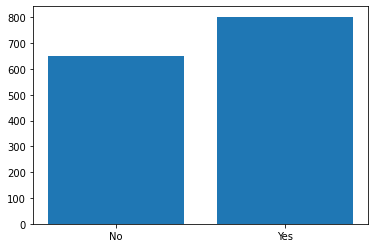

Variable : convenient


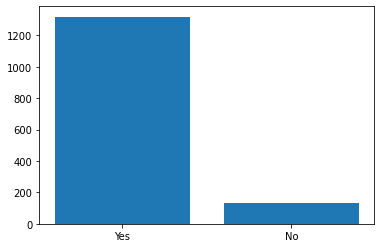

Variable : spicy


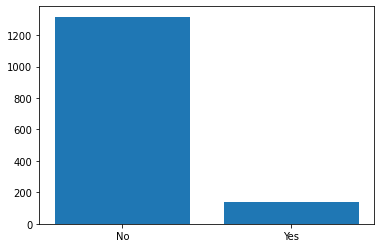

Variable : fattening


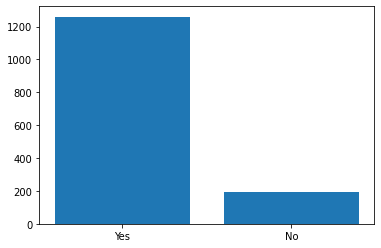

Variable : greasy


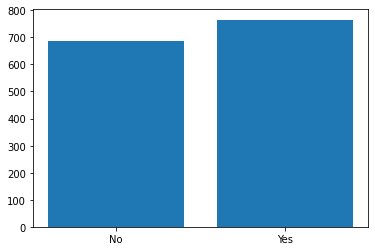

Variable : fast


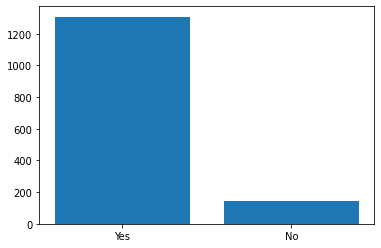

Variable : cheap


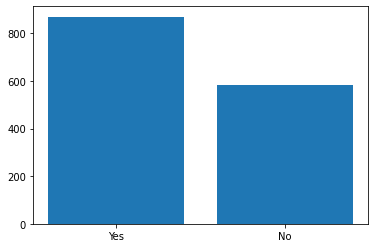

Variable : tasty


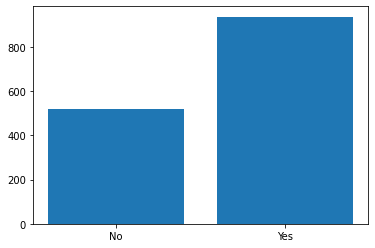

Variable : expensive


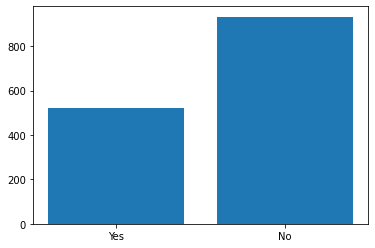

Variable : healthy


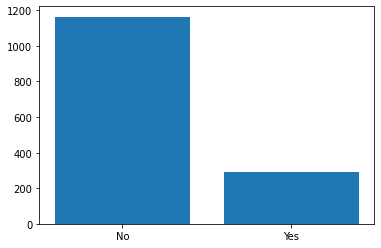

Variable : disgusting


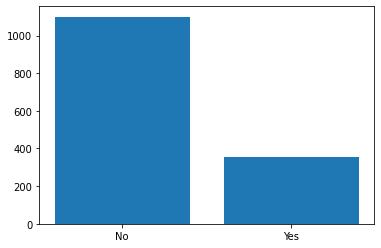

Variable : Like


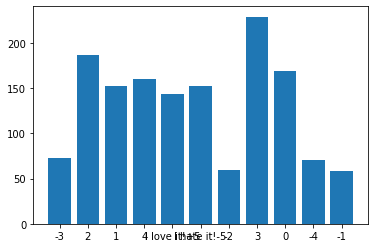

Variable : VisitFrequency


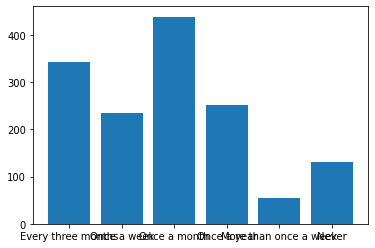

Variable : Gender


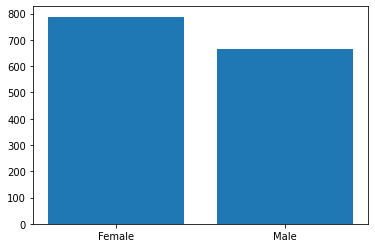

In [6]:
for column in data.columns:           ### plot bar graphs for every categorical variable 
 if data[column].dtype=='O':  
  dic={}
  types = data[column].unique()
  for label in types:   
   dic[label] = len(data[column][data[column]==label])
  print('Variable : '+str(column))
  plt.bar(dic.keys(),dic.values())
  plt.show()

Median = 45.0
Mean = 44.60495526496903
first_quantile = 33.0
third_quantile = 57.0


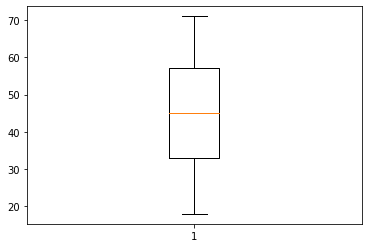

In [8]:
plt.boxplot(data['Age'])                        ### boxplot for numeric variable
median = np.median(data['Age'])                 ### calculate mean,median,first and third quantile
mean = np.mean(data['Age'])
first_quantile = np.quantile(data['Age'],0.25)
third_quantile = np.quantile(data['Age'],0.75)
print('Median = '+str(median))
print('Mean = '+str(mean))
print('first_quantile = '+str(first_quantile))
print('third_quantile = '+str(third_quantile))

### Categorical Variables

In [9]:
label_dic = {'Yes':1,'No':0}         ### Converting categorical variables to numeric variables
for column in data.columns[:-1]:
    if len(data[column].unique())==2:
        data[column] = data[column].map(label_dic)
data['Gender'] = data['Gender'].map({'Male':1,'Female':0})

In [10]:
data['Like'].unique()

array(['-3', '2', '1', '4', 'I love it!+5', 'I hate it!-5', '-2', '3',
       '0', '-4', '-1'], dtype=object)

In [11]:
dic = {'-1':'-1','-2':'-1','-3':'-2','-4':'-2','I hate it!-5':'-5','I love it!+5':'5'} ## Merging categorical variables
for i in range(len(data)):
   if data.iloc[i,-4] in list(dic.keys()):  
    data.iloc[i,-4] = dic[data.iloc[i,-4]]

In [12]:
data['Like'].value_counts()

3     229
2     187
0     169
4     160
1     152
-5    152
-2    144
5     143
-1    117
Name: Like, dtype: int64

Variable : Like


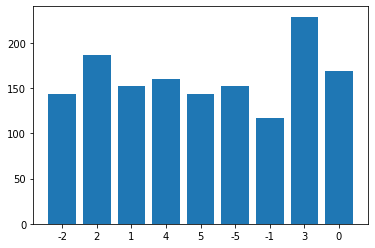

In [13]:
dic={}                          ### check for the consistence in data after merging the labels
column="Like"
types = data[column].unique()
for label in types:   
 dic[label] = len(data[column][data[column]==label])
print('Variable : '+str(column))
plt.bar(dic.keys(),dic.values())
plt.show()

In [14]:
for i in range(len(data)):             ### converting categorical data to numeric data
    data.iloc[i,-4]=int(data.iloc[i,-4]) 

In [15]:
data['Like'].value_counts()

 3    229
 2    187
 0    169
 4    160
 1    152
-5    152
-2    144
 5    143
-1    117
Name: Like, dtype: int64

Variable : VisitFrequency


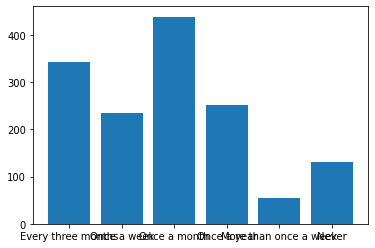

In [16]:
dic={}
column="VisitFrequency"
types = data[column].unique()
for label in types:   
 dic[label] = len(data[column][data[column]==label])
print('Variable : '+str(column))
plt.bar(dic.keys(),dic.values())
plt.show()

In [17]:
data['VisitFrequency'].value_counts()

Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: VisitFrequency, dtype: int64

In [18]:
column="VisitFrequency"
types = data[column].unique()
count=0
for label in types:
 count+=1   
 data[column][data[column]==label] = count

C:\Users\guthu\AppData\Local\Temp/ipykernel_9608/3646433020.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column][data[column]==label] = count


In [19]:
data['VisitFrequency'].value_counts()

3    439
1    342
4    252
2    235
6    131
5     54
Name: VisitFrequency, dtype: int64

In [21]:
data.head()    ### data after converting every categorical variable to numeric

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-2,61,1,0
1,1,1,0,1,1,1,1,1,1,0,0,2,51,1,0
2,0,1,1,1,1,1,0,1,1,1,0,1,62,1,0
3,1,1,0,1,1,1,1,1,0,0,1,4,69,2,0
4,0,1,0,1,1,1,1,0,0,1,0,2,49,3,1


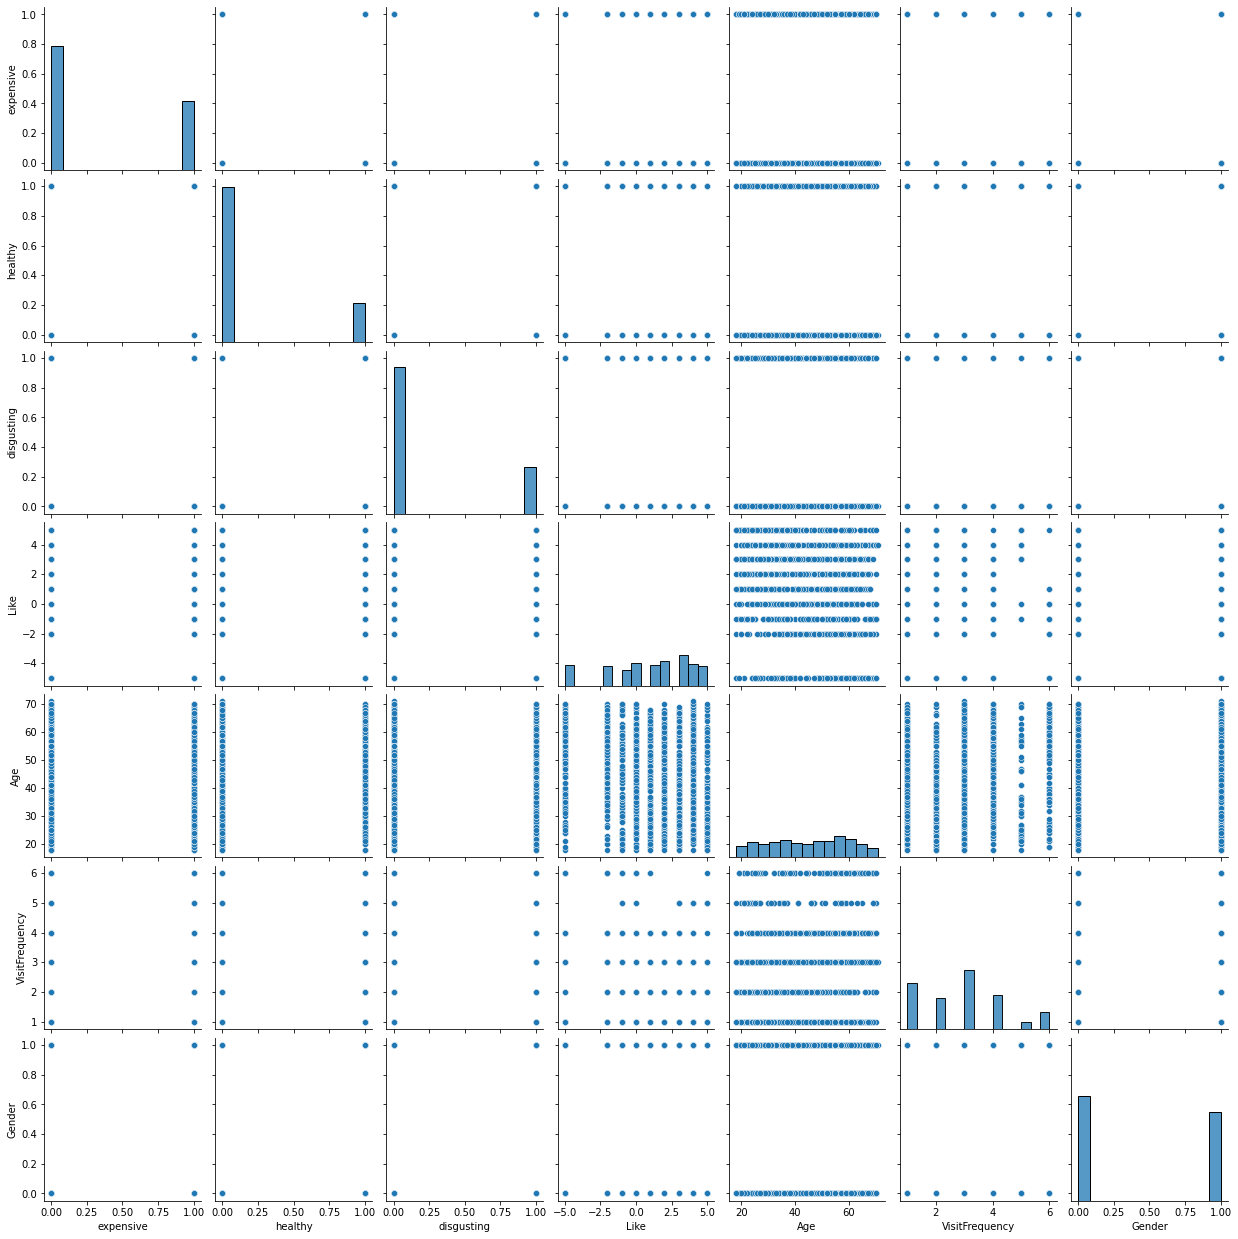

In [79]:
sns.pairplot(data.iloc[:,8:])     ### scatter plot against every variable

<AxesSubplot:>

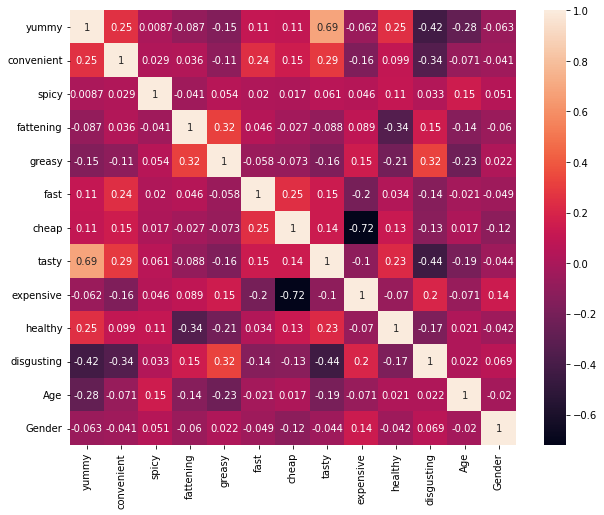

In [20]:
plt.figure(figsize=(10,8))       ### check for correlation
sns.heatmap(data.corr(),annot=True)

In [22]:
# Standardizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Df = sc.fit_transform(data)

### PCA

In [23]:
from sklearn.decomposition import PCA   ### import PCA to perform pricipal component analysis
pca = PCA()
df = pca.fit_transform(Df)
explained_variance = pca.explained_variance_ratio_    ### get the variance associated with each and every pca variable

In [24]:
explained_variance         ### Variance of the varibles after PCA transformation

array([0.24046025, 0.1203215 , 0.10604377, 0.07339303, 0.07227365,
       0.06450171, 0.05876258, 0.05369449, 0.0435438 , 0.03946597,
       0.03655994, 0.03486234, 0.02124829, 0.0178429 , 0.01702576])

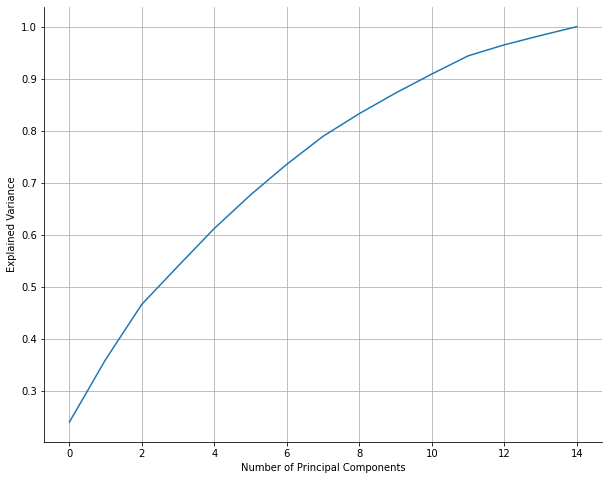

In [25]:
plt.figure(figsize=(10,8))                ### plot to see the variations of the transformed variables
plt.plot(np.cumsum(explained_variance))
plt.grid()
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance')
sns.despine()

In [26]:
from numpy.linalg import norm                ### cosine similarity to check if there is any relation between variables
def cosine_similarity(A,B):
    x = norm(A, axis=1).reshape(-1,1)
    cosine = np.dot(A,B)/(x*norm(B))
    return cosine

In [27]:
data = data.astype('float64')

In [28]:
similarity_matrix = cosine_similarity(data.iloc[:7,:],np.transpose(data.iloc[:7,:]))

<AxesSubplot:>

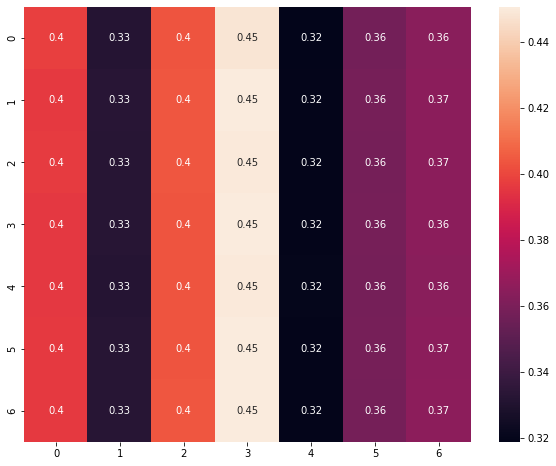

In [29]:
plt.figure(figsize=(10,8))
sns.heatmap(similarity_matrix,annot=True)

In [30]:
def euclidian_distance(A):         ### euclidean distance to check if there is any relation between variables
    L1=[]
    A = np.array(A)
    for i in range(len(A)):
        L=[]
        for j in range(len(A)):
            x=A[i,:]-A[j,:]
            x = np.dot(np.transpose(x),x)
            L.append(x)
        L1.append(L)
    return np.array(L1)

In [31]:
Dis = euclidian_distance(data.iloc[:7,:])

In [32]:
Dis      ### euclidean matrix

array([[  0., 119.,  15., 106., 168.,  56.,  46.],
       [119.,   0., 126., 331.,  13.,  19.,  29.],
       [ 15., 126.,   0.,  65., 179.,  57.,  39.],
       [106., 331.,  65.,   0., 410., 204., 180.],
       [168.,  13., 179., 410.,   0.,  44.,  60.],
       [ 56.,  19.,  57., 204.,  44.,   0.,   6.],
       [ 46.,  29.,  39., 180.,  60.,   6.,   0.]])

<AxesSubplot:>

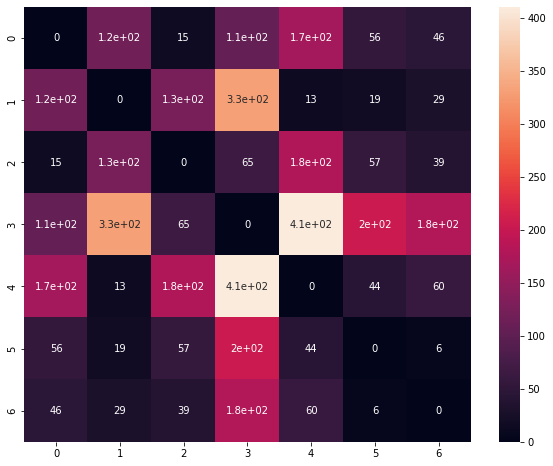

In [51]:
plt.figure(figsize=(10,8))
sns.heatmap(Dis,annot=True)

## Clustering methods

### Hierarchical clustering

In [33]:
import scipy.cluster.hierarchy as sch       ### import clustering libraries 
from sklearn.cluster import AgglomerativeClustering

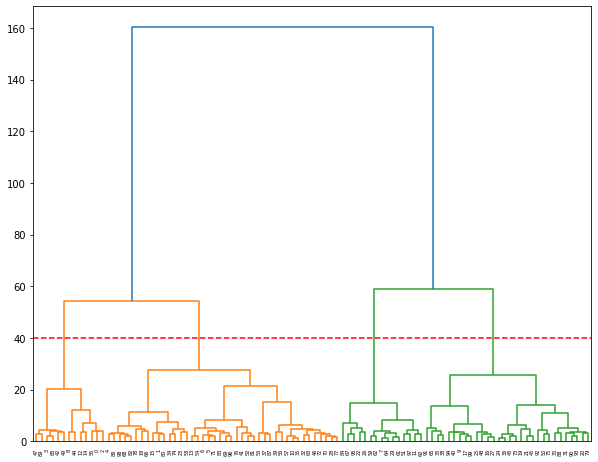

In [34]:
plt.figure(figsize=(10,8))
dendrogram=sch.dendrogram(sch.linkage(data.iloc[:100,:],method='ward'))
plt.axhline(y=40, color='r', linestyle='--')

In [35]:
hc = AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')    ### selecting the number of clusters and preparing the model

In [36]:
y_pred = hc.fit_predict(np.array(data.iloc[100:120,:]).reshape(-1,1))   ### predict the model on unseen data

In [37]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1], d

### K means

In [38]:
from sklearn.cluster import KMeans

In [39]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(df[:,1:3])   ### assume inital number of clusters
identified_clusters = kmeans.predict(df[:,1:3])

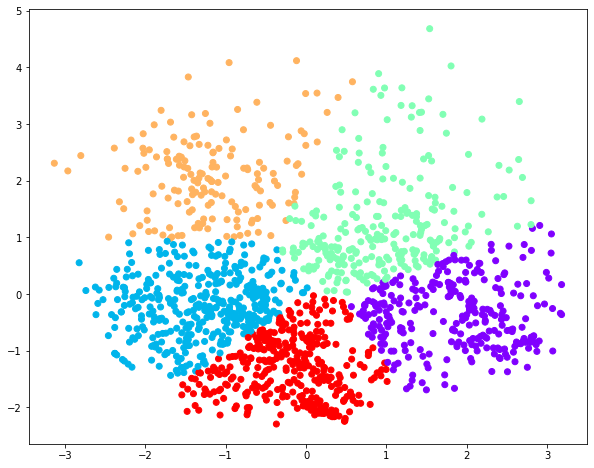

In [40]:
data_with_clusters = pd.DataFrame(df[:,1:3],columns=['convenient','spicy'])    ### plot the clusters 
data_with_clusters['Clusters'] = identified_clusters 
plt.figure(figsize=(10,8))
plt.scatter(data_with_clusters['convenient'],data_with_clusters['spicy'],c=data_with_clusters['Clusters'],cmap='rainbow')

In [41]:
data_with_clusters

,convenient,spicy,Clusters
0,-0.841956,0.369177,1
1,0.831157,-0.947861,4
2,0.876078,1.370324,2
3,-0.819476,-1.038467,4
4,-1.240901,-0.017871,1
...,...,...,...
1448,1.461173,0.625135,2
1449,0.086457,0.837605,2
1450,1.394804,0.477824,2
1451,-0.591893,2.017037,3


Text(0, 0.5, 'WCSS')

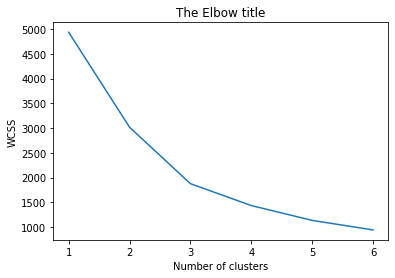

In [42]:
wcss=[]                       ### using elbow method to get optimal cluster nummber
for i in range(1,7):
 kmeans = KMeans(i)
 kmeans.fit(df[:,1:3])
 wcss_iter = kmeans.inertia_
 wcss.append(wcss_iter)
 
number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [43]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(df[:,1:3])  ### cluster with the optimal number of clusters value
identified_clusters = kmeans.predict(df[:,1:3])

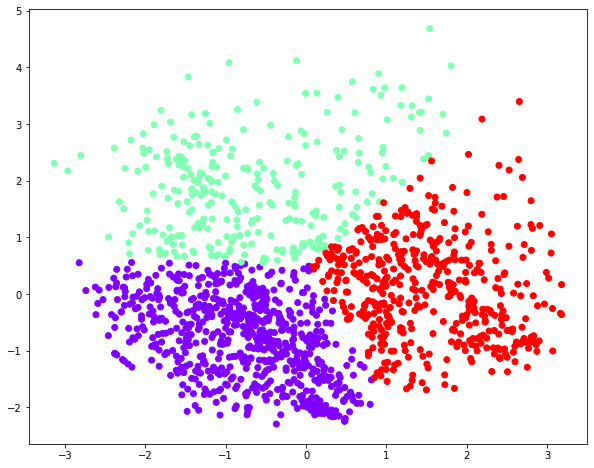

In [44]:
data_with_clusters = pd.DataFrame(df[:,1:3],columns=['convenient','spicy'])
data_with_clusters['Clusters'] = identified_clusters 
plt.figure(figsize=(10,8))
plt.scatter(data_with_clusters['convenient'],data_with_clusters['spicy'],c=data_with_clusters['Clusters'],cmap='rainbow')